[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-03-franchise-input)

## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

* 배스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
* 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요. 
* 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 필요한 라이브러리 불러오기

In [1]:
# pandas, numpy, seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [9]:
# 한글 깨짐 없이 보기
plt.rc("font", family="Malgun Gothic")

# -(마이너스) 깨짐 없이 보기
plt.rc("axes", unicode_minus=False)

In [11]:
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

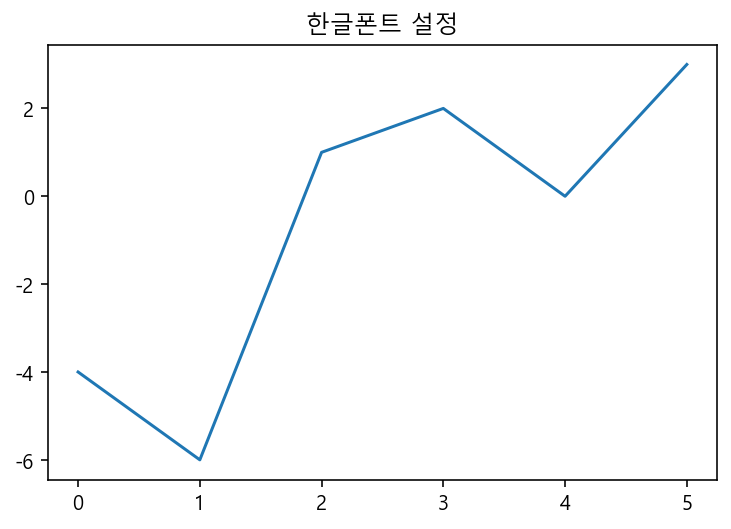

In [12]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글폰트 설정")
plt.plot([-4, -6, 1, 2, 0, 3])

## Google Colab 을 위한 코드
### Colab 에서 실행을 위한 코드

* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.

In [ ]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

### Colab 용 GoogleAuth 인증 
* 구글 드라이브에 있는 파일을 가져오기 위해 사용합니다.

In [ ]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1e91PH_KRFxNXUsx8Hi-Q2vPiorCDsOP4'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/상가업소정보_201912_01.csv')  

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [13]:
# 파일을 불러와 df 라는 변수에 담습니다.
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep='|')
df.shape

(573680, 39)

### 데이터 크기 보기

In [ ]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df.shape

### info 보기

In [15]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

<AxesSubplot:>

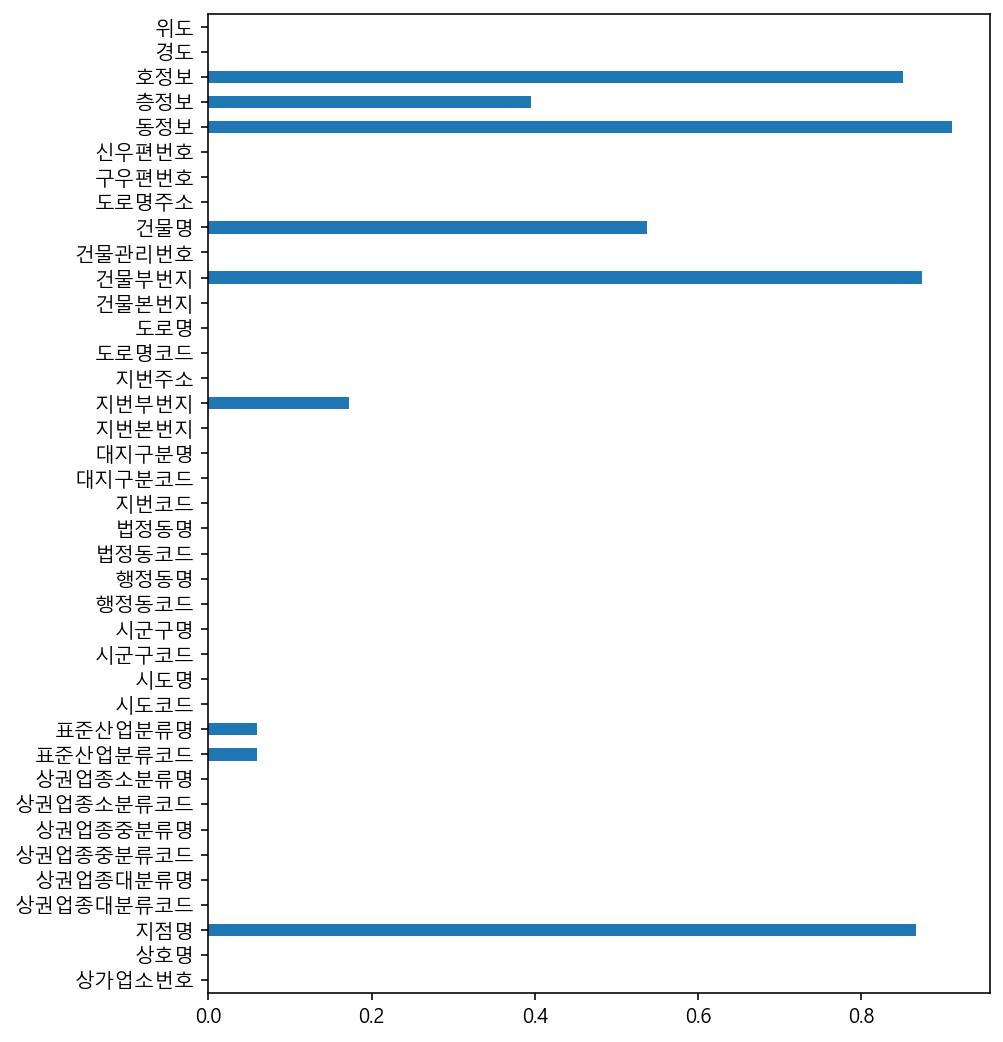

In [17]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.

df.isnull().mean().plot.barh(figsize=(7, 9))

### 사용하지 않는 컬럼 제거하기

In [20]:
# drop을 하는 방법도 있지만, 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df

상호명  상권업종대분류명      상권업종중분류명     상권업종소분류명    시도명  시군구명  \
0              와라와라호프        음식          유흥주점        호프/맥주  서울특별시   강남구   
1       커피빈코리아선릉로93길점        음식        커피점/카페  커피전문점/카페/다방  서울특별시   강남구   
2                프로포즈        음식          유흥주점        호프/맥주  서울특별시   금천구   
3            싱싱커피&토스트        음식         패스트푸드        토스트전문  부산광역시   사상구   
4            가락사우나내스낵     생활서비스      대중목욕탕/휴게   사우나/증기탕/온천  서울특별시   송파구   
...               ...       ...           ...          ...    ...   ...   
573675        비파티세리공덕        음식            한식    한식/백반/한정식  서울특별시   마포구   
573676          앤탑PC방  관광/여가/오락  PC/오락/당구/볼링등       인터넷PC방  서울특별시   성동구   
573677       오즈아레나PC방  관광/여가/오락  PC/오락/당구/볼링등       인터넷PC방  서울특별시   강남구   
573678         파인트리네일     생활서비스       이/미용/건강       발/네일케어  서울특별시  영등포구   
573679         마이리틀네일     생활서비스       이/미용/건강       발/네일케어  서울특별시   도봉구   

          행정동명   법정동명                   도로명주소          경도         위도  
0         대치1동    대치동    서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1         역삼1동    역삼동      서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2         독산3동    독산동      서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3          괘법동    괘법동        부산광역시 사상구 괘감로 37  128.980455  35.159774  
4          석촌동    석촌동        서울특별시 송파구 가락로 71  127.104071  37.500249  
...        ...    ...                     ...         ...        ...  
573675     공덕동    공덕동     서울특별시 마포구 마포대로14길 4  126.955059  37.548618  
573676  성수2가3동  성수동2가     서울특별시 성동구 성수일로8길 37  127.054615  37.545853  
573677    논현1동    논현동      서울특별시 강남구 강남대로 492  127.024102  37.506202  
573678     여의동   여의도동     서울특별시 영등포구 국제금융로 10  126.924863  37.525172  
573679     창1동     창동  서울특별시 도봉구 도봉로114길 22-8  127.035145  37.647099  

[573680 rows x 11 columns]

In [21]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [24]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
# deep=False 옵션 넣으면 원래 데이터에 영향

df_seoul = df[df["시도명"]=="서울특별시"].copy()
print(df.shape)
df_seoul.head()

(573680, 11)


상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
4       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   
5            초밥왕       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구  잠실6동  신천동   

                   도로명주소          경도         위도  
0   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
4       서울특별시 송파구 가락로 71  127.104071  37.500249  
5  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149

In [27]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 

# 그리고 shape로 갯수를 출력해 봅니다.

df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [28]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.

df_seoul["시군구명"].nunique()

25

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [31]:
#df_seoul.to_탭으로 파일 포맷 사용가능

# "seoul_open_store.csv" 라는 이름으로 저장합니다.
df_seoul.to_csv("seoul_open_store.csv", index=False)

# ->쉼표로 구분된 csv파일 생성
# index=False : 'Unnamed: 0' 자동 인덱스 컬럼 제거하는 옵션
# ->파일의 상호명 앞에 콤마가 사라짐

In [32]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.

pd.read_csv("seoul_open_store.csv").head()

상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
3       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   
4            초밥왕       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구  잠실6동  신천동   

                   도로명주소          경도         위도  
0   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3       서울특별시 송파구 가락로 71  127.104071  37.500249  
4  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149

## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [ ]:
# str.conatains에 특정 기능 넣기

In [34]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다 : str.lower()
# "상호명_소문자" 컬럼을 만듭니다.

df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [43]:
# str.extract 사용하기

df_seoul["상호명_소문자"].str.extract("(배|베)스킨라빈스|baskinrobbins").value_counts()

배    347
베    117
dtype: int64

In [46]:
# baskinrobbins를 "상호명_소문자" 컬럼으로 가져옵니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin'를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskin"),
            "상호명_소문자"]

76             배스킨라빈스
2164           베스킨라빈스
11060     베스킨라빈스은행나무점
13953          배스킨라빈스
14201          베스킨라빈스
             ...     
557464       배스킨라빈스31
557822       배스킨라빈스31
558006       배스킨라빈스31
561929       배스킨라빈스31
561930       배스킨라빈스31
Name: 상호명_소문자, Length: 466, dtype: object

In [47]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

# loc으로 상호명만 가져오기

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"),
            "상호명_소문자"]

1167              던킨도너츠
1819        던킨도너츠테크노마트점
2305         던킨도너츠창동하나로
2342      던킨도너츠용산민자역사2호
3007              던킨도너츠
              ...      
553907            던킨도너츠
554211            던킨도너츠
558894    dunkindoonuts
560984            던킨도너츠
569825            던킨도너츠
Name: 상호명_소문자, Length: 191, dtype: object

In [51]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.

df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskin|던킨|dunkin")].copy()
df_31.shape

(657, 12)

In [75]:
# 위를 "브랜드명" 컬럼을 만들어 넣어주기
# 결측치 : 던킨도너츠

df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskin")
          , "브랜드명"] = "베스킨라빈스"

# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
df_31[["상호명", "브랜드명"]].head()

상호명    브랜드명
76         배스킨라빈스  베스킨라빈스
1167        던킨도너츠   던킨도너츠
1819  던킨도너츠테크노마트점   던킨도너츠
2164       베스킨라빈스  베스킨라빈스
2305   던킨도너츠창동하나로   던킨도너츠

In [77]:
# ~은 not을 의미. 베스킨라빈스가 아닌 데이터를 찾을 때 사용
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
#           "브랜드명"]

# 결측치로 취급된 던킨도너츠의 브랜드명을
# df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")로 넣어주기

df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
           "브랜드명"]="던킨도너츠"
df_31["브랜드명"]

76        베스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      베스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    베스킨라빈스
561930    베스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [79]:
# "상권업종대분류명"을 통해 데이터가 제대로 모아졌는지 확인합니다.
# value_counts 를 통해 빈도수를 계산합니다.

df_31["상권업종대분류명"].value_counts()

음식       655
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [83]:
# "상권업종대분류명" 컬럼에서 isin 기능을 사용해서
# "소매", "생활서비스"인 데이터만 가져옵니다.

df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
358699         배스킨라빈스       소매    종합소매점      할인점  서울특별시  강남구  압구정동  신사동   
556592  baskinrobbins    생활서비스    광고/인쇄     인쇄종합  서울특별시  강남구  역삼1동  역삼동   

                     도로명주소          경도         위도        상호명_소문자    브랜드명  
358699  서울특별시 강남구 압구정로 204  127.029381  37.527375         배스킨라빈스  베스킨라빈스  
556592  서울특별시 강남구 강남대로 396  127.028289  37.498154  baskinrobbins  베스킨라빈스

In [86]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.

df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]
df_31.shape

(655, 13)

### 범주형 값으로 countplot 그리기

In [96]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.

brand_count = df_31["브랜드명"].value_counts()
brand_count

베스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

In [89]:
# normalize=True 로 빈도수의 비율을 구합니다.

df_31["브랜드명"].value_counts(normalize=True)

베스킨라빈스    0.708397
던킨도너츠     0.291603
Name: 브랜드명, dtype: float64

<AxesSubplot:>

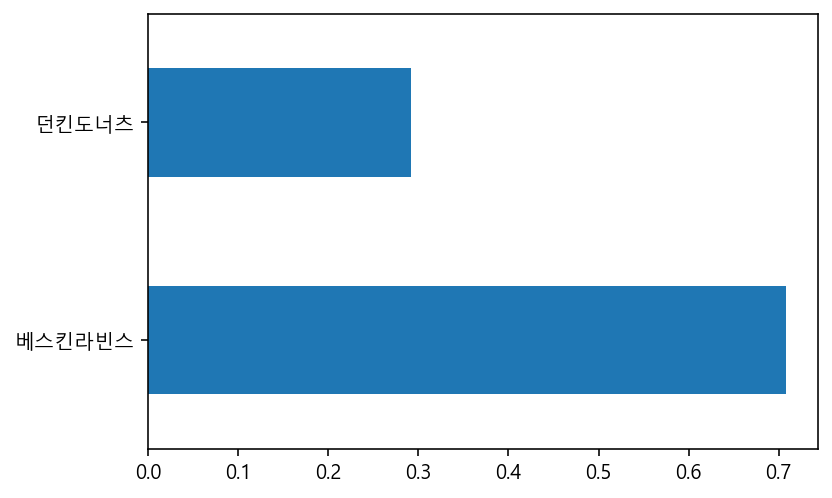

In [92]:
# df_31["브랜드명"].value_counts().plot.barh()
df_31["브랜드명"].value_counts(normalize=True).plot.barh()

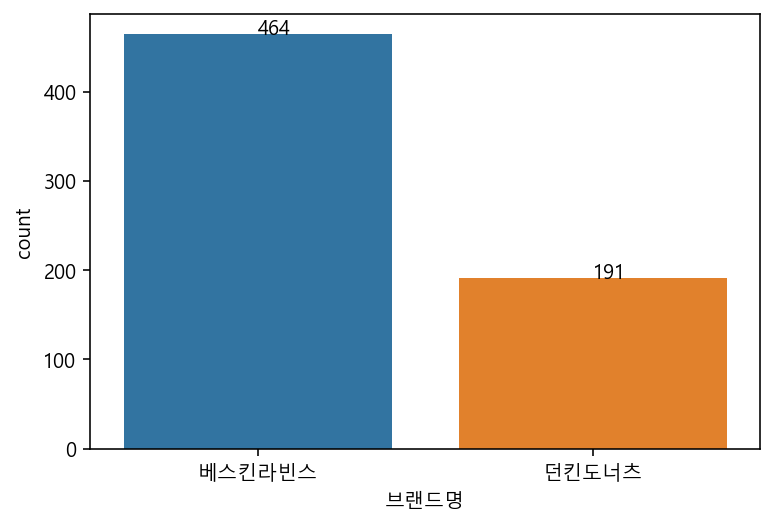

In [100]:
# countplot 을 그립니다.

g = sns.countplot(data=df_31, x="브랜드명")

# 그래프에 빈도수 숫자 표현 옵션
# g.text(x=0, y=brand_count[0], s=brand_count[0])
# g.text(x=1, y=brand_count[1], s=brand_count[1])

# 많은 값 한꺼번에(ex 시군구명)
# for i in brand_count.index:
for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

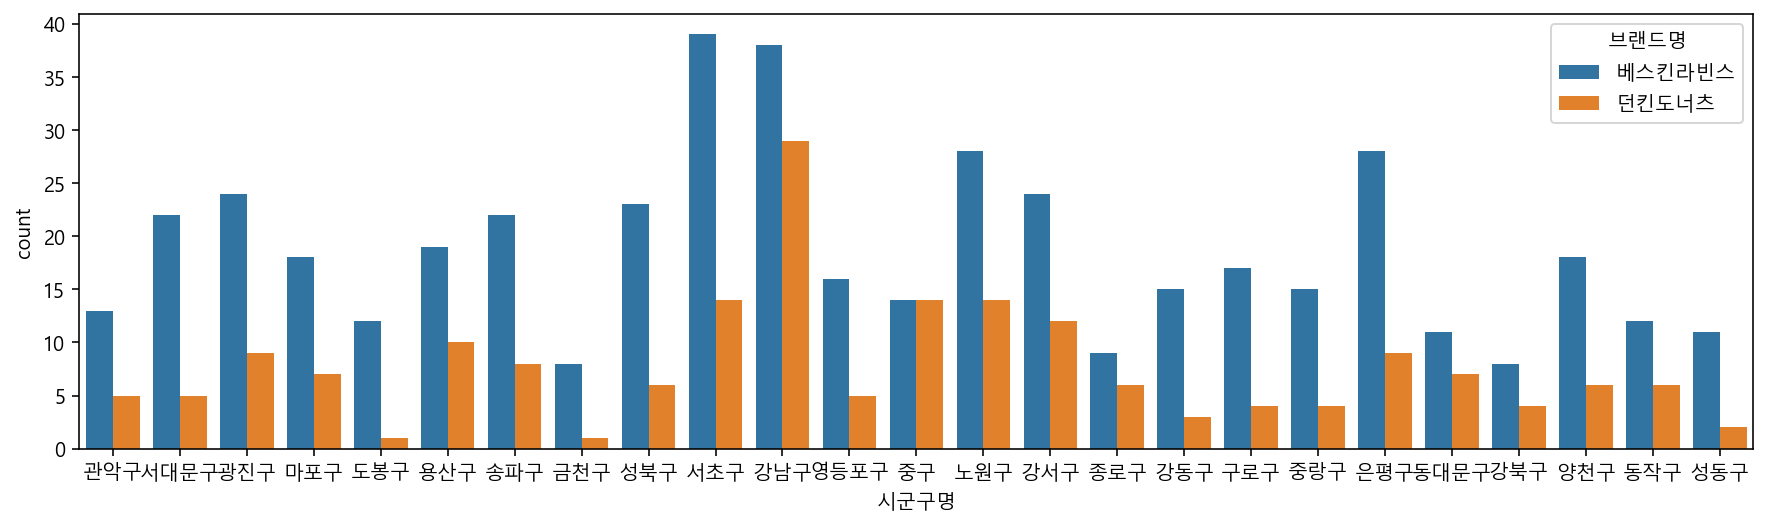

In [103]:
# 시군구명으로 빈도수를 세고
# 브랜드명으로 색상을 다르게 표현하는 countplot을 그립니다.

plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

<AxesSubplot:xlabel='경도', ylabel='위도'>

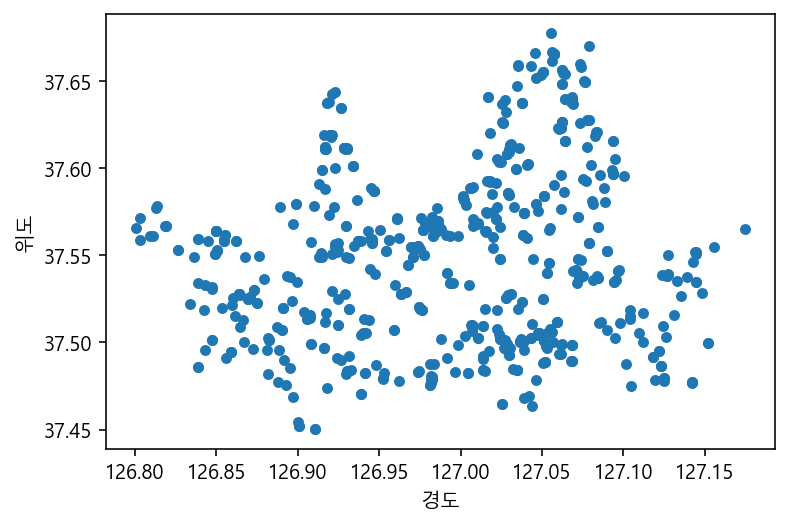

In [104]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.

df_31[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

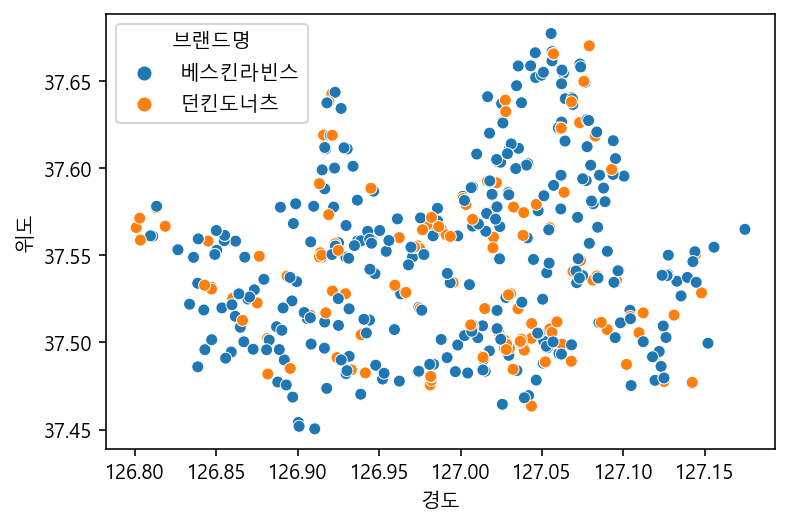

In [105]:
# seaborn의 scatterplot으로 hue에 브랜드명을 지정해서 시각화 합니다.

# 색상 표현 seaborn이 더 간편

sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

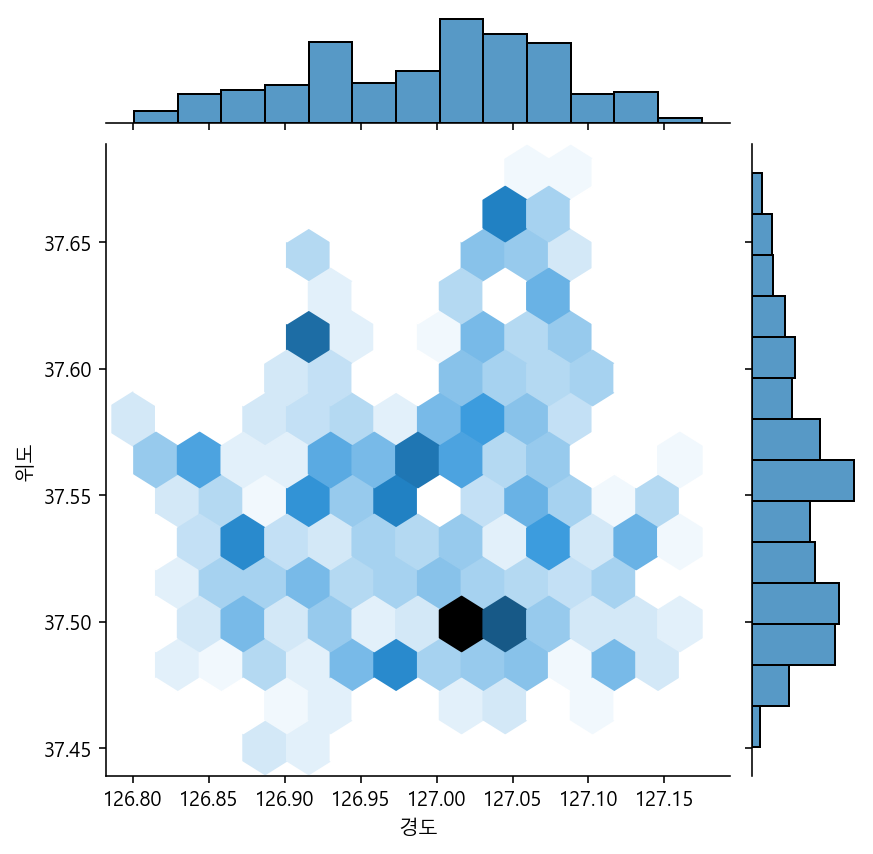

In [108]:
# 위에서 그렸던 그래프를 jointplot으로 (scatter + histogram)
# kind="hex" : 빈도수에 따라 색의 진함 달라짐

sns.jointplot(data=df_31, x="경도", y="위도", kind="hex")

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [110]:
# 지도 시각화를 위한 라이브러리

import folium

In [116]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 

lat = df_31["위도"].mean()
long = df_31["경도"].mean()

lat, long

(37.548567678569086, 126.99419527148791)

In [122]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

m = folium.Map([lat,long])

folium.Marker([37.495593, 127.039032], 
              popup="<i>던킨도너츠</i>", 
              tooltip="던킨도너츠").add_to(m)

m

In [119]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.
# random_state=31 : 계속 같은 결과 출력되도록 하는 옵션

df_31.sample(random_state=31)

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
276889  던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시  강남구  역삼1동  역삼동   

                    도로명주소          경도         위도 상호명_소문자   브랜드명  
276889  서울특별시 강남구 논현로 341  127.039032  37.495593   던킨도너츠  던킨도너츠

In [ ]:
# html 파일로 저장하기
# tooltip 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.

m.save("index.html")

### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [123]:
# 데이터프레임의 인덱스만 출력합니다. (번호)

df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,
             13042,  13925,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=655)

### 기본 마커로 표현하기

In [134]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map([lat,long], zoom_start=12)

for i in df_31.index[:50]:
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"]+" ("+df_31.loc[i, "도로명주소"]+")"
    
    icon_color = "pink"
    if df_31.loc[i, "브랜드명"]=="던킨도너츠":
        icon_color = "orange"
    
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=icon_color),
                  popup=f'<i>{title}</i>', 
                  tooltip=title).add_to(m)

# for문 끝나고 지도 출력
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [136]:
# 겹친 아이콘 처리
from folium.plugins import MarkerCluster

# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map([lat,long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index[:100]:
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"]+" ("+df_31.loc[i, "도로명주소"]+")"
    
    icon_color = "pink"
    if df_31.loc[i, "브랜드명"]=="던킨도너츠":
        icon_color = "orange"
    
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=icon_color),
                  popup=f'<i>{title}</i>', 
                  tooltip=title).add_to(marker_cluster)

m

## 파리바게뜨와 뚜레주르 분석하기

### 데이터 색인으로 가져오기

In [144]:
# str.contains 를 사용해서 뚜레(주|쥬)르|파리(바게|크라상) 으로 상호명을 찾습니다.
# df_bread 라는 데이터프레임에 담습니다.

df_bread = df_seoul[df_seoul["상호명"].str.contains("뚜레(주|쥬)르|파리(바게|크라상)")].copy()
df_bread

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명    행정동명 법정동명  \
2935           뚜레쥬르       음식  제과제빵떡케익      제과점  서울특별시   노원구    공릉2동  공릉동   
13843          뚜레쥬르       음식  제과제빵떡케익      제과점  서울특별시   서초구    서초4동  서초동   
14031   파리바게뜨길동사거리점       음식  제과제빵떡케익      제과점  서울특별시   강동구    성내3동  성내동   
14229    파리바게뜨상계제일점       음식  제과제빵떡케익      제과점  서울특별시   노원구   상계10동  상계동   
14246     뚜레쥬르중계브라운       음식  제과제빵떡케익      제과점  서울특별시   노원구  중계2.3동  중계동   
...             ...      ...      ...      ...    ...   ...     ...  ...   
559820        파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   송파구     위례동  장지동   
561538        파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   강서구    방화1동  마곡동   
561810        파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   관악구     청룡동  봉천동   
569327        파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   마포구     상암동  상암동   
569479        파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시  동대문구    휘경2동  휘경동   

                         도로명주소          경도         위도      상호명_소문자  
2935         서울특별시 노원구 공릉로 213  127.077295  37.628289         뚜레쥬르  
13843       서울특별시 서초구 서초대로 411  127.025904  37.498098         뚜레쥬르  
14031      서울특별시 강동구 천호대로 1128  127.136501  37.534154  파리바게뜨길동사거리점  
14229        서울특별시 노원구 노원로 540  127.059227  37.661367   파리바게뜨상계제일점  
14246    서울특별시 노원구 동일로203가길 29  127.064245  37.639918    뚜레쥬르중계브라운  
...                        ...         ...        ...          ...  
559820     서울특별시 송파구 위례광장로 136  127.142223  37.477113        파리바게뜨  
561538  서울특별시 강서구 마곡서1로 139-13  126.818015  37.569257        파리바게뜨  
561810   서울특별시 관악구 남부순환로218길 1  126.950620  37.480955        파리바게뜨  
569327       서울특별시 마포구 성암로 267  126.890966  37.581110        파리바게뜨  
569479      서울특별시 동대문구 망우로 106  127.065123  37.590647        파리바게뜨  

[825 rows x 12 columns]

In [147]:
df_seoul["상호명"].str.extract("뚜레(주|쥬)르")[0].value_counts()

쥬    257
주      1
Name: 0, dtype: int64

### 가져온 데이터가 맞는지 확인하기

In [150]:
# 잘못 가져온 데이터가 있는지 확인합니다.
df_bread["상권업종대분류명"].value_counts()

음식       823
학문/교육      2
Name: 상권업종대분류명, dtype: int64

In [152]:
# 제과점과 상관 없을 것 같은 상점을 추출합니다.
df_bread[df_bread["상권업종대분류명"]=="학문/교육"]

상호명 상권업종대분류명    상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명    법정동명  \
354693  파리바게뜨교육소    학문/교육  학원-자격/국가고시  학원-제과기술  서울특별시  영등포구  영등포동  영등포동8가   
406627      뚜레쥬르    학문/교육  학원-자격/국가고시  학원-제과기술  서울특별시   금천구   가산동     가산동   

                        도로명주소          경도         위도   상호명_소문자  
354693     서울특별시 영등포구 영중로 159  126.905405  37.530553  파리바게뜨교육소  
406627  서울특별시 금천구 가산디지털1로 128  126.883684  37.477224      뚜레쥬르

In [153]:
# "상권업종대분류명"이 "학문/교육"이 아닌 것만 가져옵니다.
print(df_bread.shape)
df_bread = df_bread[df_bread["상권업종대분류명"]!="학문/교육"].copy()
print(df_bread.shape)

(825, 12)
(823, 12)


In [156]:
# 상호명의 unique 값을 봅니다.
df_bread["상호명"].unique()

array(['뚜레쥬르', '파리바게뜨길동사거리점', '파리바게뜨상계제일점', '뚜레쥬르중계브라운', '파리바게뜨-판매옥수점',
       '파리바게뜨당고개점', '파리바게뜨목동오거리점', '뚜레쥬르신당역점', '파리바게뜨', '파리바게뜨서강신수점',
       '파리크라상', '파리바게뜨수유중앙점', '파리바게뜨가락중앙점', '파리바게뜨종로구기',
       '뚜레쥬르왕십리민자역사점왕십리민자역사점', '파리크라상교대역점', '뚜레쥬르도선사거리점', '여의도2호파리크라상',
       '목동파리크라상', '뚜레쥬르개봉역점', '파리바게뜨외대점', '파리크라상파스쿠찌홍', '파리크라상파스쿠찌압',
       'CJ뚜레쥬르', '신목파리바게뜨', '방주산업뚜레쥬르광화문경희궁의', '파리크라상파스쿠찌서', '파리크라상파스쿠찌도',
       '강동경희파리바게뜨', '파리크라상이대점', '파리크라상파스쿠찌압구정역2호', '뚜레쥬르송천센트레빌점',
       '파리크라상잠바주스디큐브', '파리크라상잠바주스대치역', '파리바게트', '상계뚜레쥬르', '뚜레쥬르대림3동점',
       '뚜레쥬르목4동점', '카페약수파리바게트', '파리바게뜨가좌역점', '파리바게뜨영등포구청점', '뚜레쥬르독산지식센터점',
       '파리바게뜨수락리버시티', '파리바게뜨방학중앙점', '파리바게뜨중계2호점', '뚜레쥬르방화역점', '파리바게뜨중앙대점',
       '뚜레쥬르레이크펠리스점', '파리바게뜨장안현대점', '뚜레쥬르우이점', '파리바게뜨성북점', '뚜레쥬르양천푸른점',
       '파리바게뜨마장대로점', '파리바게뜨문정역점', '뚜레쥬르엔시티보라매', '파리바게뜨종로시그니처점',
       '파리바게뜨상계보람점', '파리바게뜨성동세무서점', '파리바게뜨여의경도점', '파리바게뜨구로제일점',
       '뚜레쥬르창동SM마트', '파리바게뜨카페대학로점', '파리바게뜨대림역점', '파리바게뜨월계미성', '파리크라상서래점',
       '파리바게뜨금천한양점', '씨

In [159]:
# 상호명이 '파스쿠찌|잠바주스'가 아닌 것만 가져오세요.

print(df_bread.shape)
df_bread=df_bread[~df_bread["상호명"].str.contains('파스쿠찌|잠바주스')].copy()
print(df_bread.shape)

(823, 12)
(812, 12)


In [166]:
# 브랜드명 컬럼을 만듭니다
# "파리바게뜨" 에 해당되는 데이터에 대한 값을 채워줍니다.

df_bread.loc[df_bread["상호명"].str.contains("파리바게"), "브랜드명"] = "파리바게뜨"
df_bread[["상호명", "브랜드명"]].head()

상호명   브랜드명
2935          뚜레쥬르    NaN
13843         뚜레쥬르    NaN
14031  파리바게뜨길동사거리점  파리바게뜨
14229   파리바게뜨상계제일점  파리바게뜨
14246    뚜레쥬르중계브라운    NaN

In [167]:
# 브랜드명 컬럼의 결측치는 "뚜레쥬르" 이기 때문에
# fillna 를 사용해서 값을 채웁니다.

df_bread["브랜드명"] = df_bread["브랜드명"].fillna("뚜레쥬르")
df_bread[["상호명", "브랜드명"]].head()

상호명   브랜드명
2935          뚜레쥬르   뚜레쥬르
13843         뚜레쥬르   뚜레쥬르
14031  파리바게뜨길동사거리점  파리바게뜨
14229   파리바게뜨상계제일점  파리바게뜨
14246    뚜레쥬르중계브라운   뚜레쥬르

### 범주형 변수 빈도수 계산하기

In [168]:
# 브랜드명의 빈도수를 봅니다.

df_bread["브랜드명"].value_counts()

파리바게뜨    515
뚜레쥬르     297
Name: 브랜드명, dtype: int64

In [169]:
df_bread["브랜드명"].value_counts(normalize=True)

파리바게뜨    0.634236
뚜레쥬르     0.365764
Name: 브랜드명, dtype: float64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

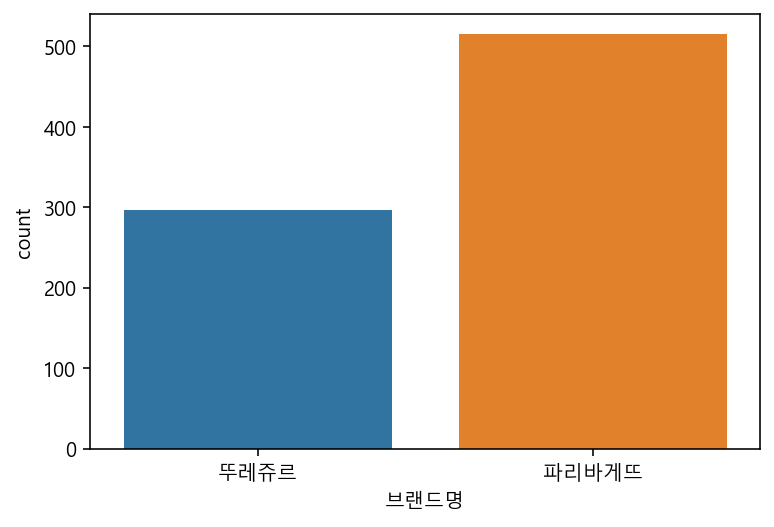

In [170]:
# countplot 으로 브랜드명을 그려봅니다.

sns.countplot(data=df_bread, x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

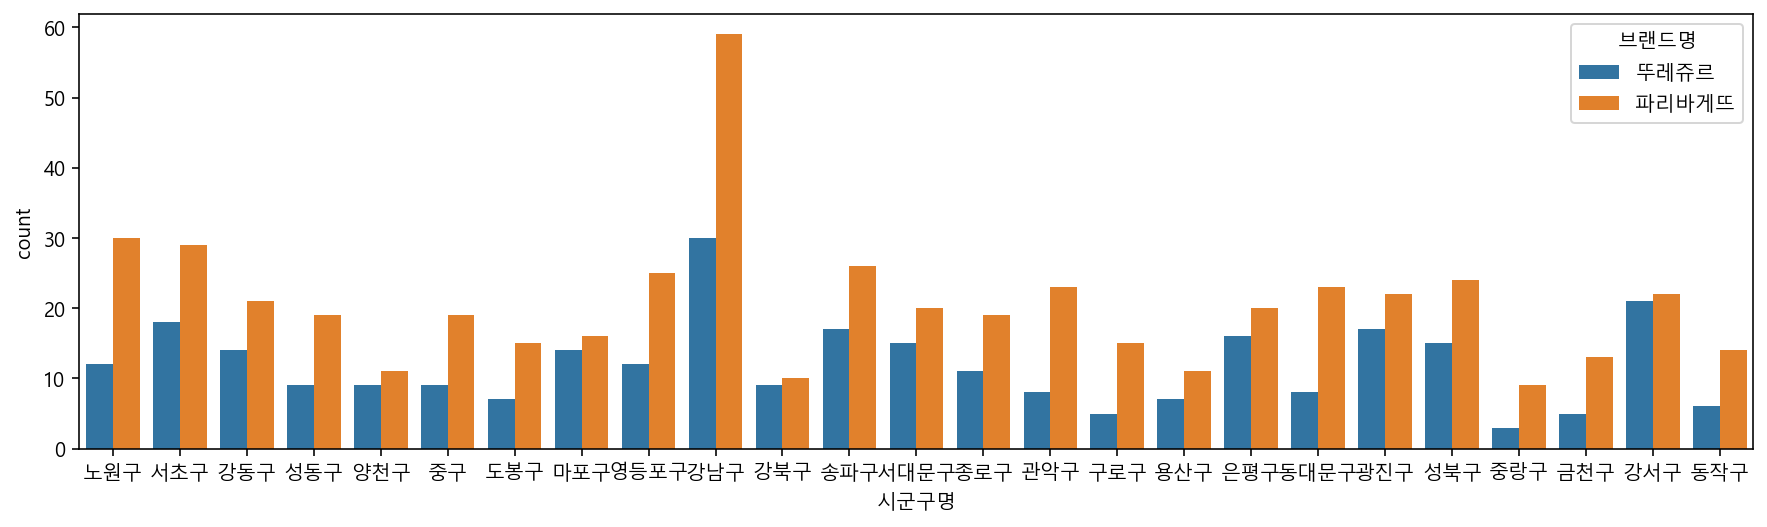

In [173]:
# 시군구별로 브랜드명의 빈도수 차이를 비교합니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df_bread, x="시군구명", hue="브랜드명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

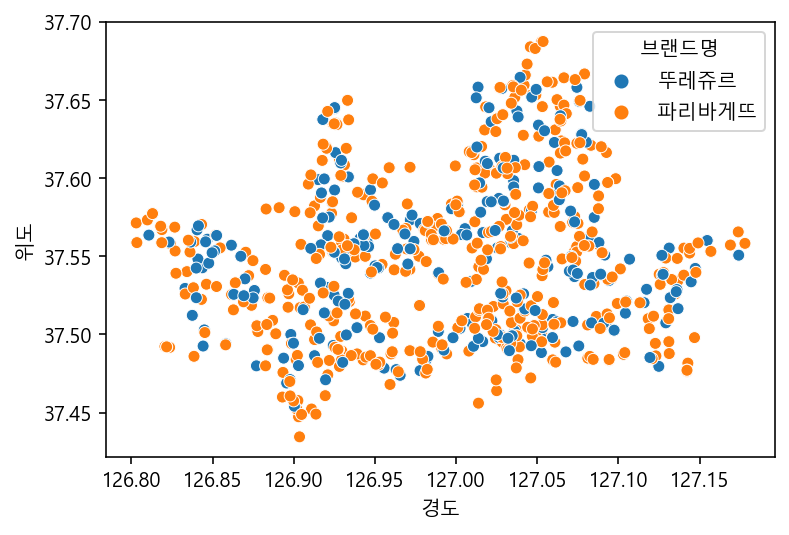

In [174]:
# scatterplot 으로 위경도를 표현해 봅니다.

sns.scatterplot(data=df_bread, x="경도", y="위도", hue="브랜드명")

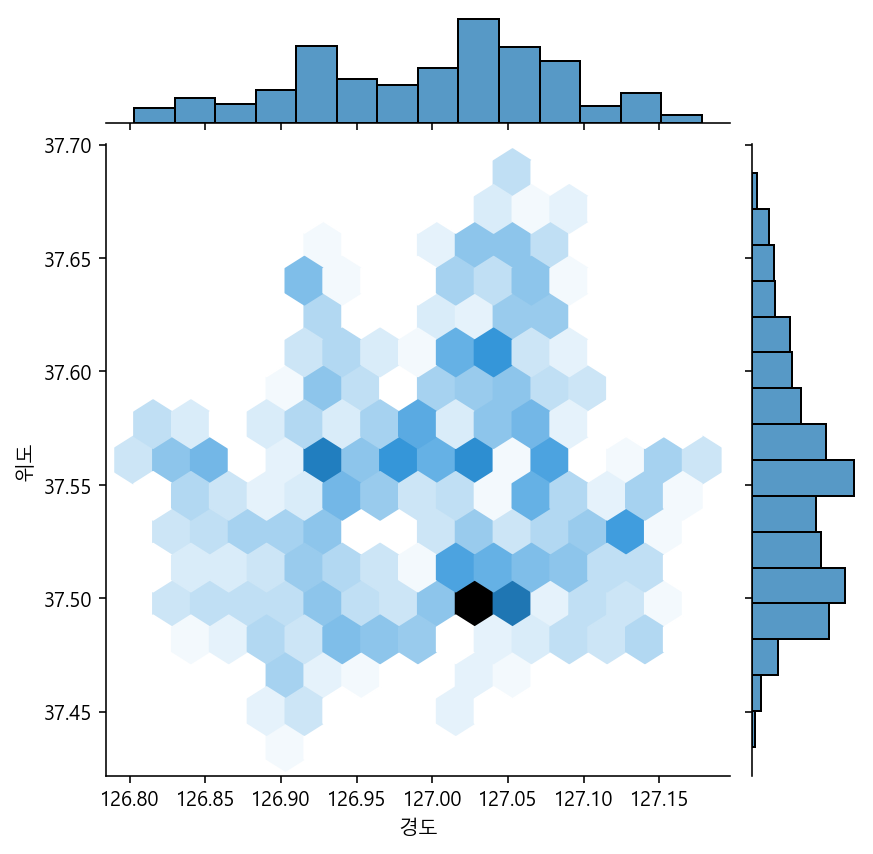

In [175]:
# jointplot 으로 위경도를 표현해 봅니다.

sns.jointplot(data=df_bread, x="경도", y="위도", kind="hex")

## 지도에 표현하기
### Marker 로 위치를 찍어보기

In [176]:
df_bread.index

Int64Index([  2935,  13843,  14031,  14229,  14246,  14713,  14842,  14889,
             14897,  15019,
            ...
            544366, 544527, 551365, 555475, 556168, 559820, 561538, 561810,
            569327, 569479],
           dtype='int64', length=812)

In [177]:
df_bread.loc[2935, "위도"]

37.62828881495879

In [178]:
for i in df_bread.index:
    print(i)

2935
13843
14031
14229
14246
14713
14842
14889
14897
15019
15075
15210
15295
15308
15313
15932
21076
21098
29050
29756
32976
34846
37488
40363
44665
52769
55142
67512
72200
87075
88167
89741
110250
113801
127482
129359
129476
135663
138210
140703
142629
147219
149653
149962
159501
162889
164411
164856
166524
166853
166854
167366
167711
168353
169336
171022
171755
173389
174333
175508
175761
182862
186608
187749
187981
189464
190647
191338
191900
192027
192163
192752
195070
196818
200552
201124
201162
201254
202723
202830
203299
204549
204649
204690
205108
206922
207957
207997
208552
209289
209292
209311
210514
213906
214127
214162
214251
214388
216658
217070
217580
218007
220102
221211
221751
221797
222152
222321
222328
222405
226807
227436
227505
227540
227900
228823
230578
230665
230669
231267
231593
231802
235081
237546
237864
237998
238152
239434
239463
240390
241097
241507
242005
243714
243715
244224
244238
244297
244746
244793
245329
245460
246453
246748
247705
247966
248634
2508

In [179]:
m = folium.Map([lat,long], zoom_start=12)

for i in df_bread.index:
    sub_lat = df_bread.loc[i, "위도"]
    sub_long = df_bread.loc[i, "경도"]
    
    title = df_bread.loc[i, "상호명"]+" ("+df_bread.loc[i, "도로명주소"]+")"
    
    icon_color = "blue"
    if df_bread.loc[i, "브랜드명"]=="뚜레쥬르":
        icon_color = "green"
    
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=icon_color),
                  popup=f'<i>{title}</i>', 
                  tooltip=title).add_to(m)
 
m.save('index.html')
m

In [180]:
# CircleMarker
m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")

for i in df_bread.index:
    sub_lat = df_bread.loc[i, "위도"]
    sub_long = df_bread.loc[i, "경도"]
    
    title = df_bread.loc[i, "상호명"] + " - " + df_bread.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_bread.loc[i, "브랜드명"] == "뚜레쥬르":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

m.save('paris-tour.html')
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [181]:
m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")

marker_cluster = MarkerCluster().add_to(m)

for i in df_bread.index:
    sub_lat = df_bread.loc[i, "위도"]
    sub_long = df_bread.loc[i, "경도"]
    
    title = df_bread.loc[i, "상호명"] + " - " + df_bread.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_bread.loc[i, "브랜드명"] == "뚜레쥬르":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat, sub_long], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(marker_cluster)

m.save('paris-tour.html')
m

### Heatmap 으로 그리기
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Heatmap.ipynb

In [183]:
# Cluster heatmap 예제 이해하기

data = (
    np.random.normal(size=(100, 3)) *
    np.array([[1, 1, 1]]) +
    np.array([[48, 5, 1]])
).tolist()

data[:5]

[[48.782887341573236, 5.2767435766718425, 0.4979870459244111],
 [46.22080682674262, 4.304440770665293, 1.8005737354209486],
 [47.02296295211306, 5.769199027587358, 1.5497886969399455],
 [48.76603614209171, 6.223040465340767, 2.560728600477968],
 [48.23291721224448, 5.172300829746724, 0.5925375505050601]]

In [192]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기

heat = df_bread[["위도", "경도", "브랜드명"]].copy()
heat["브랜드명"] = heat["브랜드명"].replace("뚜레쥬르", 1).replace("파리바게뜨", 1)
heat = heat.values

# 가중치를 주고 싶을 때 숫자에 차이두기

In [189]:
heat[:5]

array([[ 37.62828881, 127.07729473,   1.        ],
       [ 37.49809817, 127.02590362,   1.        ],
       [ 37.53415376, 127.13650069,   2.        ],
       [ 37.66136731, 127.059227  ,   2.        ],
       [ 37.63991755, 127.06424515,   1.        ]])

In [193]:
# HeatMap 그리기
from folium.plugins import HeatMap

m = folium.Map([lat, long], tiles='stamentoner', zoom_start=12)

HeatMap(heat).add_to(m)

m.save('Heatmap.html')
m

In [194]:
m = folium.Map([lat, long], tiles='stamentoner', zoom_start=12)

for i in df_bread.index:
    sub_lat = df_bread.loc[i, "위도"]
    sub_long = df_bread.loc[i, "경도"]
    
    title = df_bread.loc[i, "상호명"] + " - " + df_bread.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_bread.loc[i, "브랜드명"] == "뚜레쥬르":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)
    
HeatMap(heat).add_to(m)

m.save('Heatmap.html')
m